# Project 1


# Setup

### Import Utils

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import math
import scipy

### Import Data

In [2]:
covid_confirmed_facts    = pd.read_csv('covid_confirmed_usafacts.csv')
election_data            = pd.read_csv('npr-2016-election-data.csv')
covid_county_population  = pd.read_csv('covid_county_population_usafacts.csv')

In [3]:
covid_confirmed_facts.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,7306,7306,7320,7329,7341,7346,7347,7350,7365,7375
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,22337,22337,22464,22556,22642,22734,22802,22876,23032,23184
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,2367,2367,2373,2377,2386,2389,2394,2396,2411,2415
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2704,2704,2708,2713,2719,2721,2727,2733,2747,2753


In [4]:
covid_county_population.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [25]:
election_data.head()

,State,Clinton,Trump
0,AK,38,53
1,AL,35,63
2,AR,34,60
3,AZ,45,50
4,CA,62,33


# Data Synthesis

### Aggregate by State

Drop the country columns.

In [5]:
covid_confirmed_facts = covid_confirmed_facts.drop(columns=['County Name', 'countyFIPS', 'StateFIPS'])

In [6]:
covid_state_confirmed_facts = covid_confirmed_facts.groupby('State').sum()

In [7]:
covid_state_confirmed_facts.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,68977,68977,69189,69189,69453,69453,69453,69891,69891,70328
AL,0,0,0,0,0,0,0,0,0,0,...,555215,555215,556613,557578,558577,559478,560202,560920,562311,563943
AR,0,0,0,0,0,0,0,0,0,0,...,355460,358951,360259,361238,361238,361238,361238,365132,367007,367007
AZ,0,0,0,0,1,1,1,1,1,1,...,901562,901907,903852,904866,906117,906117,906117,909283,910437,911480
CA,0,0,0,0,2,3,3,4,4,4,...,3736534,3736534,3739625,3743242,3747897,3747897,3747897,3761997,3766720,3772006


In [8]:
covid_county_population = covid_county_population.drop(columns=['countyFIPS', 'County Name'])

In [9]:
covid_state_population = covid_county_population.groupby('State').sum()

In [10]:
covid_state_population.head()

,population
State,
AK,731545
AL,4903185
AR,3017804
AZ,7278717
CA,39512223


### Merge Data Sets

In [11]:
pop_case_elec = covid_state_population.merge(
    covid_state_confirmed_facts,
    on='State'
).merge(
    election_data,
    on='State'
)

In [12]:
pop_case_elec.head()

,State,population,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,Clinton,Trump
0,AK,731545,0,0,0,0,0,0,0,0,...,69189,69189,69453,69453,69453,69891,69891,70328,38,53
1,AL,4903185,0,0,0,0,0,0,0,0,...,556613,557578,558577,559478,560202,560920,562311,563943,35,63
2,AR,3017804,0,0,0,0,0,0,0,0,...,360259,361238,361238,361238,361238,365132,367007,367007,34,60
3,AZ,7278717,0,0,0,0,1,1,1,1,...,903852,904866,906117,906117,906117,909283,910437,911480,45,50
4,CA,39512223,0,0,0,0,2,3,3,4,...,3739625,3743242,3747897,3747897,3747897,3761997,3766720,3772006,62,33


### Create Indicator clinton_win

In [13]:
pop_case_elec['clinton_win'] = pop_case_elec['Clinton'] > pop_case_elec['Trump']

In [14]:
pop_case_elec.head()

,State,population,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,Clinton,Trump,clinton_win
0,AK,731545,0,0,0,0,0,0,0,0,...,69189,69453,69453,69453,69891,69891,70328,38,53,False
1,AL,4903185,0,0,0,0,0,0,0,0,...,557578,558577,559478,560202,560920,562311,563943,35,63,False
2,AR,3017804,0,0,0,0,0,0,0,0,...,361238,361238,361238,361238,365132,367007,367007,34,60,False
3,AZ,7278717,0,0,0,0,1,1,1,1,...,904866,906117,906117,906117,909283,910437,911480,45,50,False
4,CA,39512223,0,0,0,0,2,3,3,4,...,3743242,3747897,3747897,3747897,3761997,3766720,3772006,62,33,True


### Ease of Use Modifications

In [15]:
pop_case_elec = pop_case_elec.rename( columns={ 'State':'state', 'Clinton':'clinton', 'Trump':'trump' } )

In [16]:
sum_pop_case_elec = pop_case_elec

sum_pop_case_elec['total_cases'] = pop_case_elec['2021-07-21']
sum_pop_case_elec['month_cases'] = pop_case_elec['2021-07-21'] - pop_case_elec['2021-06-21']

sum_pop_case_elec.head()

,state,population,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,clinton,trump,clinton_win,total_cases,month_cases
0,AK,731545,0,0,0,0,0,0,0,0,...,69453,69453,69891,69891,70328,38,53,False,70328,2213
1,AL,4903185,0,0,0,0,0,0,0,0,...,559478,560202,560920,562311,563943,35,63,False,563943,14930
2,AR,3017804,0,0,0,0,0,0,0,0,...,361238,361238,365132,367007,367007,34,60,False,367007,21312
3,AZ,7278717,0,0,0,0,1,1,1,1,...,906117,906117,909283,910437,911480,45,50,False,911480,21368
4,CA,39512223,0,0,0,0,2,3,3,4,...,3747897,3747897,3761997,3766720,3772006,62,33,True,3772006,68547


# Quantitative Exploration

### Modeling Utilities

In [17]:
from scipy.optimize import curve_fit

def regression( model, x_data, y_data ):
    found_betas = []
    covariance  = 0
    
    found_betas, covariance = curve_fit( model, x_data, y_data )
        
    return found_betas, covariance

In [18]:
def logistic_model( x, beta_0, beta_1, beta_2 ):
    return beta_0 / (1 + np.exp(beta_1 * ( beta_2 - x ))) 

In [19]:
def linear_model( x, beta_0, beta_1 ):
    return ( beta_0 * x ) + beta_1

## Recent Cases

### Recent Cases Model Linear

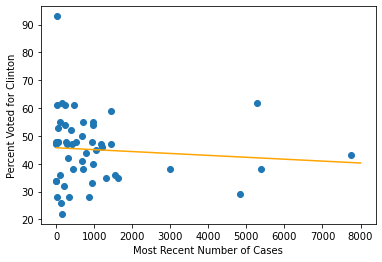

In [26]:
recent_cases       = pop_case_elec['2021-07-21'] - pop_case_elec['2021-07-20']
clinton_percentage = pop_case_elec['clinton']

_ = plt.scatter( recent_cases, clinton_percentage )

_ = plt.xlabel('Most Recent Number of Cases')
_ = plt.ylabel('Percent Voted for Clinton')


betas, covariance = regression( linear_model, recent_cases, clinton_percentage )

x = np.linspace(0, 8000, num=100)
y = linear_model( x, betas[0], betas[1] )

plt.plot( x, y, color='orange' )

plt.show()

## Recent Cases Per Capita

### Recent Cases Per Capita Linear Model

[]

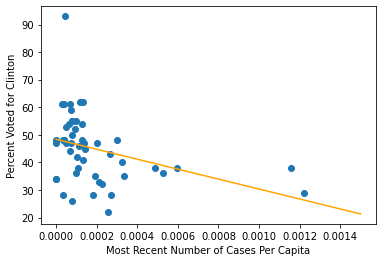

In [21]:
recent_cases_per_cap = recent_cases / pop_case_elec['population']

_ = plt.scatter( recent_cases_per_cap, clinton_percentage )

_ = plt.xlabel('Most Recent Number of Cases Per Capita')
_ = plt.ylabel('Percent Voted for Clinton')

_ = plt.title('Clinton Vote Percentage vs Most Recent Cases Per Capita')

betas, covariance = regression( linear_model, recent_cases_per_cap, clinton_percentage )

x = np.linspace(0, 0.0015, num=100 )
y = linear_model( x, betas[0], betas[1] )

_ = plt.plot( x, y, color='orange' )

plt.plot()

In [22]:
print(covariance)

[[ 4.59997755e+07 -8.38631787e+03]
 [-8.38631787e+03  4.22199391e+00]]


In [23]:
numpy_cov = np.cov( recent_cases_per_cap, clinton_percentage )

In [24]:
corr = numpy_cov[0,1]
print(corr)

-0.0010772832216615212
